<a href="https://colab.research.google.com/github/aghapygad336/Fake-and-real-news/blob/master/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau

from tensorflow import keras  
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
 from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
df_train = pd.read_csv('/content/drive/My Drive/ask/Character Recognition /digit-recognizer/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/ask/Character Recognition /digit-recognizer/test.csv')

In [8]:
df_train.columns


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [9]:
X = df_train.iloc[:, 1:].values
y = df_train.iloc[:, 0].values

X.shape, y.shape, X.dtype, y.dtype


((42000, 784), (42000,), dtype('int64'), dtype('int64'))

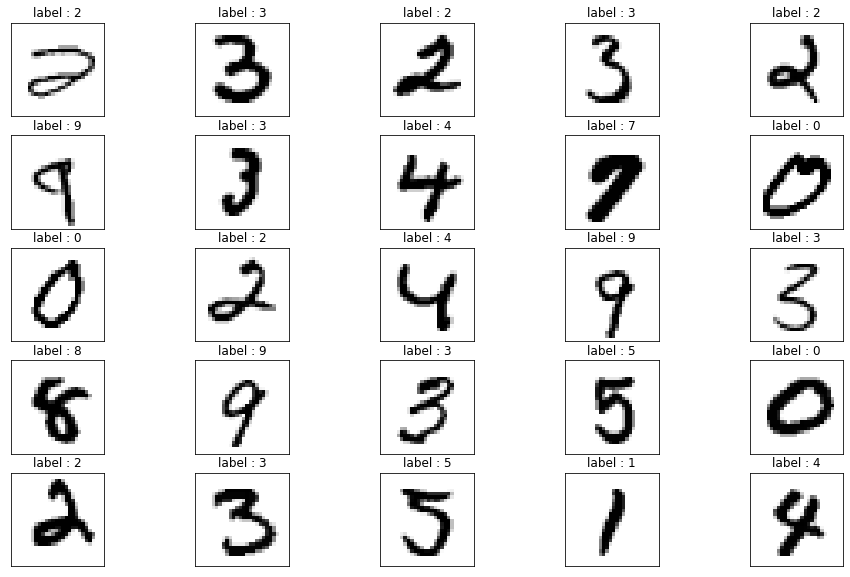

In [10]:
random_indexes = np.random.choice(range(len(X)), 25)

X_random = X[random_indexes]
y_random = y[random_indexes]


plt.figure(figsize = (16, 10))
for i in range(25):
    image = X_random[i]
    image = image.reshape((28, 28))
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, "binary")
    plt.title('label : {}'.format(y_random[i]))
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [12]:
X_test = df_test.values
X_test.shape
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled
X = X.reshape((42000, 28, 28, 1))
datagen = ImageDataGenerator(rotation_range=10,  zoom_range = 0.1,  width_shift_range=0.1,  height_shift_range=0.1)


In [21]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)


In [22]:
# Creating 3 objects of the same CNN architecture and saving in model_list
model_list = []

for i in range(3):
    model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = [28, 28, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')])

    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'nadam', metrics = ['accuracy'])
    model_list.append(model)


In [ ]:
# Training all the 3 CNNs in the ensemble together

history = [0] * 3

for i in range(3):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.08)
    history[i] = model_list[i].fit_generator(datagen.flow(X, y, batch_size = 128), 
                                             epochs = 20, validation_data = (X_valid, y_valid), callbacks = [reduce_lr])


Epoch 1/20
329/329 [==============================] - 195s 593ms/step - loss: 0.1344 - accuracy: 0.9600 - val_loss: 0.0581 - val_accuracy: 0.9830 - lr: 0.0010
Epoch 2/20
329/329 [==============================] - 195s 593ms/step - loss: 0.1059 - accuracy: 0.9692 - val_loss: 0.0518 - val_accuracy: 0.9821 - lr: 0.0010
Epoch 3/20
329/329 [==============================] - 195s 594ms/step - loss: 0.0894 - accuracy: 0.9735 - val_loss: 0.0388 - val_accuracy: 0.9860 - lr: 0.0010
Epoch 4/20
329/329 [==============================] - 197s 600ms/step - loss: 0.0832 - accuracy: 0.9762 - val_loss: 0.0329 - val_accuracy: 0.9899 - lr: 0.0010
Epoch 5/20
329/329 [==============================] - 196s 597ms/step - loss: 0.0752 - accuracy: 0.9777 - val_loss: 0.0284 - val_accuracy: 0.9920 - lr: 0.0010
Epoch 6/20
329/329 [==============================] - 197s 599ms/step - loss: 0.0692 - accuracy: 0.9793 - val_loss: 0.0221 - val_accuracy: 0.9929 - lr: 0.0010
Epoch 7/20
152/329 [============>.............

In [ ]:
ensemble_cnn_pred = np.zeros((X_test.shape[0], 10))
ensemble_cnn_pred.shape
X_test_scaled = X_test_scaled.reshape((28000, 28, 28, 1))


In [ ]:
for i in range(7):
  ensemble_cnn_pred = ensemble_cnn_pred + model_list[i].predict(X_test_scaled)


In [ ]:
np.sum(ensemble_cnn_pred[0])


In [ ]:
pred_df_ensemble_cnn = pd.DataFrame(columns = ['ImageId', 'Label'])
pred_df_ensemble_cnn['ImageId'] = np.arange(1, 28001)
pred_df_ensemble_cnn['Label'] = ensemble_cnn_pred
